In [1]:
import pandas as pd
import evds
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from datetime import date
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import numpy as np
import warnings
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error
from evds import evdsAPI
import pandas as pd
import numpy as np
import requests
import json
from urllib.parse import urlencode
warnings.filterwarnings("ignore")

In [2]:
buyume=pd.read_excel("gayrisafi yurtici hasila harcama yontemiyle mevsim ve takvim etkisinden arindirilmis zincirlenmis ha.xls")
buyume=buyume.iloc[:34,[1,19,20,21,22]].T
buyume=buyume.iloc[:,8:]
veri=[]
for i in range(len(buyume.columns)):
   veri.append(buyume.iloc[:,i].values[1:])

In [3]:
veri=np.array(veri)
veri=veri.reshape(1,-1)
veri=pd.DataFrame(veri.T)
veri.columns=["Büyüme"]
veri=veri.dropna()
veri=veri.set_index(pd.date_range(start="1999-03-31",freq="Q",periods=len(veri)))
veri

,Büyüme
1999-03-31,-1.68582
1999-06-30,-0.563716
1999-09-30,-1.686618
1999-12-31,2.98742
2000-03-31,1.574851
...,...
2023-12-31,1.166981
2024-03-31,0.97541
2024-06-30,-0.195958
2024-09-30,-0.067054


In [4]:
with open("C:/Users/Bora/Desktop/api.txt") as api:
    key=api.read()

In [5]:
params = {
    'series': "TP.DK.USD.S.YTL",
    'startDate': "01-01-2006",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 6,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

usd = formatted_response['items']
usd = pd.DataFrame(usd)


usd = usd.drop(columns=['UNIXTIME','Tarih'])
usd.columns = ['USD/TL']
usd['USD/TL'] = pd.to_numeric(usd['USD/TL'])
usd=usd.set_index(pd.date_range(start="2006-01-31",freq="Q",periods=len(usd)))
usd=usd.pct_change()*100
usd=usd.dropna()
usd

,USD/TL
2006-06-30,9.336700
2006-09-30,3.109109
2006-12-31,-2.951977
2007-03-31,-3.182185
2007-06-30,-5.023656
...,...
2024-06-30,4.643019
2024-09-30,3.555937
2024-12-31,3.098104
2025-03-31,4.839644


In [6]:
params = {
    'series': "TP.KREDI.L001",
    'startDate': "31-12-2007",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 5,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

kredi = formatted_response['items']
kredi = pd.DataFrame(kredi)


kredi = kredi.drop(columns=['UNIXTIME','Tarih'])
kredi.columns = ['Kredi']
kredi['Kredi'] = pd.to_numeric(kredi['Kredi'])
kredi=kredi.dropna()
kredi=kredi.set_index(pd.date_range(start="31-12-2007",freq="M",periods=len(kredi)))
kredi=kredi.resample("Q").last()
kredi=kredi.pct_change()*100
kredi=kredi.set_index(pd.date_range(start="31-12-2007",freq="Q",periods=len(kredi)))
kredi=kredi.dropna()
kredi

,Kredi
2008-03-31,8.415812
2008-06-30,8.611317
2008-09-30,6.465078
2008-12-31,0.301982
2009-03-31,-1.910862
...,...
2024-03-31,10.994405
2024-06-30,8.314733
2024-09-30,7.989453
2024-12-31,6.786281


In [7]:
params = {
    'series': "TP.KKHARTUT.KT1",
    'startDate': "31-03-2014",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 5,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

kart = formatted_response['items']
kart = pd.DataFrame(kart)


kart = kart.drop(columns=['UNIXTIME','Tarih'])
kart.columns = ['Kart']
kart['Kart'] = pd.to_numeric(kart['Kart'])
kart=kart.set_index(pd.date_range(start="31-03-2014",freq="M",periods=len(kart)))
kart=kart.dropna()
kart=kart.resample("Q").mean()
kart=kart.pct_change().dropna()*100
kart

,Kart
2014-06-30,6.754972
2014-09-30,4.782597
2014-12-31,0.186316
2015-03-31,3.013984
2015-06-30,10.511476
2015-09-30,2.186056
2015-12-31,-0.932084
2016-03-31,0.701274
2016-06-30,7.737326
2016-09-30,1.395230


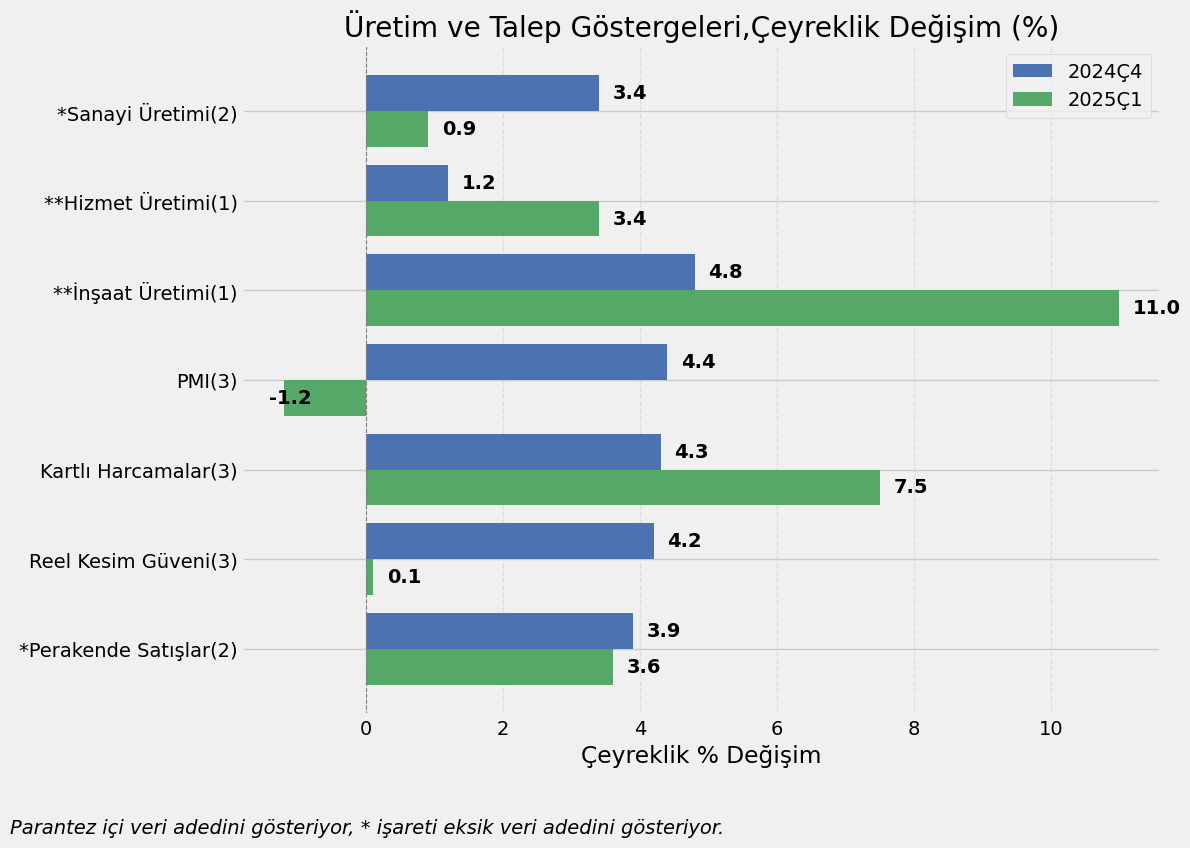

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Veri tanımı
gösterge = pd.DataFrame(columns=["2024Ç4", "2025Ç1"])
gösterge.loc["*Sanayi Üretimi(2)"] = [3.4, 0.9]
gösterge.loc["**Hizmet Üretimi(1)"] = [1.2, 3.4]
gösterge.loc["**İnşaat Üretimi(1)"] = [4.8, 11.0]
gösterge.loc["PMI(3)"] = [4.4, -1.2]
gösterge.loc["Kartlı Harcamalar(3)"] = [4.3, 7.5]
gösterge.loc["Reel Kesim Güveni(3)"] = [4.2, 0.1]
gösterge.loc["*Perakende Satışlar(2)"] = [3.9, 3.6]

# 2024 üstte olacak şekilde sıralama
gösterge = gösterge[["2024Ç4", "2025Ç1"]]

y = np.arange(len(gösterge))
bar_width = 0.4

# Grafik oluştur
fig, ax = plt.subplots(figsize=(12, 8))
bars1 = ax.barh(y - bar_width/2, gösterge["2024Ç4"], height=bar_width, label='2024Ç4', color='#4C72B0')
bars2 = ax.barh(y + bar_width/2, gösterge["2025Ç1"], height=bar_width, label='2025Ç1', color='#55A868')

# Değerleri kalın olarak ekle
for bars in [bars1, bars2]:
    for bar in bars:
        width = bar.get_width()
        ha = 'left' if width >= 0 else 'right'
        offset = 0.2 if width >= 0 else 0.4  # negatiflerde daha büyük boşluk
        ax.text(width + offset, bar.get_y() + bar.get_height()/2,
                f'{width:.1f}', va='center', ha=ha, fontweight='bold')

fig.text(0.01, -0.05, "Parantez içi veri adedini gösteriyor, * işareti eksik veri adedini gösteriyor.", 
         ha='left', va='center', fontsize=14, style='italic')

# Eksen ayarları
ax.set_yticks(y)
ax.set_yticklabels(gösterge.index)
ax.invert_yaxis()  # Bu satır önemli!
ax.set_xlabel('Çeyreklik % Değişim')
ax.set_title('Üretim ve Talep Göstergeleri,Çeyreklik Değişim (%)')
ax.axvline(0, color='gray', linewidth=0.8, linestyle='--')
ax.legend()
plt.tight_layout()
plt.grid(True, axis='x', linestyle='--', alpha=0.5)
plt.show()


In [9]:
params = {
    'series': "TP.CLI2.A01",
    'startDate': "31-03-1999",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 6,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

öncü = formatted_response['items']
öncü = pd.DataFrame(öncü)


öncü = öncü.drop(columns=['UNIXTIME','Tarih'])
öncü.columns = ['Öncü Gösterge']
öncü['Öncü Gösterge'] = pd.to_numeric(öncü['Öncü Gösterge'])
öncü=öncü.set_index(pd.date_range(start="31-03-1999",freq="Q",periods=len(öncü)))
öncü=öncü.pct_change()*100
öncü=öncü.dropna()
öncü

,Öncü Gösterge
1999-06-30,1.976838
1999-09-30,-0.090503
1999-12-31,2.521770
2000-03-31,3.539974
2000-06-30,-0.170672
...,...
2024-03-31,0.845456
2024-06-30,0.693852
2024-09-30,0.842966
2024-12-31,2.127951


In [10]:
params = {
    'series': "TP.IHRACATBEC.9999",
    'startDate': "31-03-1999",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 6,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

ihracat = formatted_response['items']
ihracat = pd.DataFrame(ihracat)


ihracat = ihracat.drop(columns=['UNIXTIME','Tarih'])
ihracat.columns = ['İhracat']
ihracat['İhracat'] = pd.to_numeric(ihracat['İhracat'])
ihracat=ihracat.set_index(pd.date_range(start="31-03-1999",freq="Q",periods=len(ihracat)))
ihracat=ihracat.pct_change()*100
ihracat=ihracat.dropna()
ihracat

,İhracat
2013-06-30,2.938221
2013-09-30,-2.843534
2013-12-31,6.008618
2014-03-31,0.797169
2014-06-30,0.069491
2014-09-30,-4.059849
2014-12-31,2.623426
2015-03-31,-6.256287
2015-06-30,-2.065737
2015-09-30,-7.425967


In [11]:
params = {
    'series': "TP.ITHALATBEC.9999",
    'startDate': "31-03-1999",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 6,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

ithalat = formatted_response['items']
ithalat = pd.DataFrame(ithalat)


ithalat = ithalat.drop(columns=['UNIXTIME','Tarih'])
ithalat.columns = ['İthalat']
ithalat['İthalat'] = pd.to_numeric(ithalat['İthalat'])
ithalat=ithalat.set_index(pd.date_range(start="31-03-1999",freq="Q",periods=len(ithalat)))
ithalat=ithalat.pct_change()*100
ithalat=ithalat.dropna()
ithalat

,İthalat
2013-06-30,13.045979
2013-09-30,-6.944537
2013-12-31,2.390350
2014-03-31,-8.643594
2014-06-30,6.982644
2014-09-30,-3.016522
2014-12-31,2.233891
2015-03-31,-14.936426
2015-06-30,2.664102
2015-09-30,-8.070364


In [12]:
params = {
    'series': "TP.KTF17",
    'startDate': "31-03-1999",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 6,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

tfaiz = formatted_response['items']
tfaiz = pd.DataFrame(tfaiz)


tfaiz = tfaiz.drop(columns=['UNIXTIME','Tarih'])
tfaiz.columns = ['Ticari Faiz']
tfaiz['Ticari Faiz'] = pd.to_numeric(tfaiz['Ticari Faiz'])
tfaiz=tfaiz.set_index(pd.date_range(start="31-03-1999",freq="Q",periods=len(tfaiz)))
tfaiz=tfaiz.dropna()
tfaiz

,Ticari Faiz
2002-03-31,58.993077
2002-06-30,49.074615
2002-09-30,45.385385
2002-12-31,43.189231
2003-03-31,44.611538
...,...
2024-06-30,64.998462
2024-09-30,60.784615
2024-12-31,59.899231
2025-03-31,58.065385


In [13]:

params = {
    'series': "TP.TRY.MT01",
    'startDate': "31-03-1999",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 6,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})



formatted_response = json.loads(response.content)

mfaiz1ay = formatted_response['items']
mfaiz1ay = pd.DataFrame(mfaiz1ay)


mfaiz1ay = mfaiz1ay.drop(columns=['UNIXTIME','Tarih'])
mfaiz1ay.columns = ['Mevduat Faiz 1Ay']
mfaiz1ay['Mevduat Faiz 1Ay'] = pd.to_numeric(mfaiz1ay['Mevduat Faiz 1Ay'])
mfaiz1ay=mfaiz1ay.set_index(pd.date_range(start="31-03-1999",freq="Q",periods=len(mfaiz1ay)))
mfaiz1ay=mfaiz1ay.dropna()
mfaiz1ay

,Mevduat Faiz 1Ay
2002-03-31,61.068462
2002-06-30,51.750769
2002-09-30,50.345385
2002-12-31,48.413077
2003-03-31,47.924615
...,...
2024-06-30,55.676923
2024-09-30,54.312308
2024-12-31,54.683077
2025-03-31,50.635385


In [14]:

params = {
    'series': "TP.TRY.MT02",
    'startDate': "31-03-1999",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 6,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})



formatted_response = json.loads(response.content)

mfaiz3ay = formatted_response['items']
mfaiz3ay = pd.DataFrame(mfaiz3ay)


mfaiz3ay = mfaiz3ay.drop(columns=['UNIXTIME','Tarih'])
mfaiz3ay.columns = ['Mevduat Faiz 3Ay']
mfaiz3ay['Mevduat Faiz 3Ay'] = pd.to_numeric(mfaiz3ay['Mevduat Faiz 3Ay'])
mfaiz3ay=mfaiz3ay.set_index(pd.date_range(start="31-03-1999",freq="Q",periods=len(mfaiz3ay)))
mfaiz3ay=mfaiz3ay.dropna()
mfaiz3ay

,Mevduat Faiz 3Ay
2002-03-31,59.005385
2002-06-30,50.468462
2002-09-30,50.828462
2002-12-31,48.276923
2003-03-31,47.048462
...,...
2024-06-30,63.980000
2024-09-30,59.349231
2024-12-31,59.299231
2025-03-31,52.840769


In [15]:

params = {
    'series': "TP.TSANAYMT2021.Y1",
    'startDate': "31-03-1999",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 6,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})



formatted_response = json.loads(response.content)

sanayi = formatted_response['items']
sanayi = pd.DataFrame(sanayi)


sanayi = sanayi.drop(columns=['UNIXTIME','Tarih'])
sanayi.columns = ['Sanayi']
sanayi['Sanayi'] = pd.to_numeric(sanayi['Sanayi'])
sanayi=sanayi.set_index(pd.date_range(start="31-03-1999",freq="Q",periods=len(sanayi)))
sanayi=sanayi.pct_change()*100
sanayi=sanayi.dropna()
sanayi

,Sanayi
2005-06-30,-0.616297
2005-09-30,3.830180
2005-12-31,2.898139
2006-03-31,1.522466
2006-06-30,1.885331
...,...
2024-03-31,3.072172
2024-06-30,-3.893249
2024-09-30,-1.047028
2024-12-31,3.392068


In [16]:

params = {
    'series': "TP.PR.ARZ13",
    'startDate': "31-03-1999",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 6,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})



formatted_response = json.loads(response.content)

m2 = formatted_response['items']
m2 = pd.DataFrame(m2)


m2 = m2.drop(columns=['UNIXTIME','Tarih'])
m2.columns = ['M2']
m2['M2'] = pd.to_numeric(m2['M2'])
m2=m2.set_index(pd.date_range(start="31-03-1999",freq="Q",periods=len(m2)))
m2=m2.pct_change()*100
m2=m2.dropna()
m2

,M2
2006-03-31,1.554679
2006-06-30,9.638037
2006-09-30,3.877008
2006-12-31,4.679794
2007-03-31,5.001742
...,...
2024-03-31,7.259381
2024-06-30,6.092967
2024-09-30,7.933976
2024-12-31,5.786708


In [17]:

params = {
    'series': "TP.PR.ARZ22",
    'startDate': "31-03-1999",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 6,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})



formatted_response = json.loads(response.content)

m3 = formatted_response['items']
m3 = pd.DataFrame(m3)


m3 = m3.drop(columns=['UNIXTIME','Tarih'])
m3.columns = ['M3']
m3['M3'] = pd.to_numeric(m3['M3'])
m3=m3.set_index(pd.date_range(start="31-03-1999",freq="Q",periods=len(m3)))
m3=m3.pct_change()*100
m3=m3.dropna()
m3

,M3
2006-03-31,1.798053
2006-06-30,9.639824
2006-09-30,2.739330
2006-12-31,3.939840
2007-03-31,4.554048
...,...
2024-03-31,8.359733
2024-06-30,7.890625
2024-09-30,10.977930
2024-12-31,7.814873


In [18]:

params = {
    'series': "TP.FG.J0",
    'startDate': "31-03-1999",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 6,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})



formatted_response = json.loads(response.content)

tüfe = formatted_response['items']
tüfe = pd.DataFrame(tüfe)


tüfe = tüfe.drop(columns=['UNIXTIME','Tarih'])
tüfe.columns = ['TÜFE']
tüfe['TÜFE'] = pd.to_numeric(tüfe['TÜFE'])
tüfe=tüfe.set_index(pd.date_range(start="31-03-1999",freq="Q",periods=len(tüfe)))
tüfe=tüfe.pct_change()*100
tüfe=tüfe.dropna()
tüfe

,TÜFE
2003-06-30,3.503735
2003-09-30,0.738513
2003-12-31,2.892589
2004-03-31,2.043974
2004-06-30,1.557564
...,...
2024-03-31,14.448411
2024-06-30,9.863378
2024-09-30,8.297692
2024-12-31,7.690816


In [19]:

params = {
    'series': "TP.TUFE1YI.T1",
    'startDate': "31-03-1999",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 6,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})



formatted_response = json.loads(response.content)

üfe = formatted_response['items']
üfe = pd.DataFrame(üfe)


üfe = üfe.drop(columns=['UNIXTIME','Tarih'])
üfe.columns = ['ÜFE']
üfe['ÜFE'] = pd.to_numeric(üfe['ÜFE'])
üfe=üfe.set_index(pd.date_range(start="31-03-1999",freq="Q",periods=len(üfe)))
üfe=üfe.pct_change()*100
üfe=üfe.dropna()
üfe

,ÜFE
1999-06-30,12.224920
1999-09-30,10.767969
1999-12-31,15.393947
2000-03-31,16.175187
2000-06-30,7.151731
...,...
2024-03-31,9.732860
2024-06-30,9.025570
2024-09-30,5.170864
2024-12-31,3.362095


In [20]:

params = {
    'series': "TP.GY1.N2.MA",
    'startDate': "31-03-1999",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 6,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})



formatted_response = json.loads(response.content)

reelgüven = formatted_response['items']
reelgüven = pd.DataFrame(reelgüven)


reelgüven = reelgüven.drop(columns=['UNIXTIME','Tarih'])
reelgüven.columns = ['Reel Güven']
reelgüven['Reel Güven'] = pd.to_numeric(reelgüven['Reel Güven'])
reelgüven=reelgüven.set_index(pd.date_range(start="31-03-1999",freq="Q",periods=len(reelgüven)))
reelgüven=reelgüven.pct_change()*100
reelgüven=reelgüven.dropna()
reelgüven

,Reel Güven
2007-06-30,-3.372093
2007-09-30,0.992780
2007-12-31,-2.442657
2008-03-31,-2.992366
2008-06-30,-6.578533
...,...
2024-06-30,-0.648508
2024-09-30,-3.426893
2024-12-31,4.190605
2025-03-31,0.097308


In [21]:

params = {
    'series': "TP.TG2.Y01",
    'startDate': "31-03-1999",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 6,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})



formatted_response = json.loads(response.content)

tuketicigüven = formatted_response['items']
tuketicigüven = pd.DataFrame(tuketicigüven)


tuketicigüven = tuketicigüven.drop(columns=['UNIXTIME','Tarih'])
tuketicigüven.columns = ['Tüketici Güven']
tuketicigüven['Tüketici Güven'] = pd.to_numeric(tuketicigüven['Tüketici Güven'])
tuketicigüven=tuketicigüven.set_index(pd.date_range(start="31-03-1999",freq="Q",periods=len(tuketicigüven)))
tuketicigüven=tuketicigüven.pct_change()*100
tuketicigüven=tuketicigüven.dropna()
tuketicigüven

,Tüketici Güven
2012-06-30,-2.657194
2012-09-30,-0.096161
2012-12-31,-2.936119
2013-03-31,4.365104
2013-06-30,2.759161
2013-09-30,0.114167
2013-12-31,0.360455
2014-03-31,-3.903252
2014-06-30,4.686077
2014-09-30,-1.604023


In [22]:

params = {
    'series': "TP.KKO.MA",
    'startDate': "31-03-1999",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 6,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})



formatted_response = json.loads(response.content)

kko = formatted_response['items']
kko = pd.DataFrame(kko)


kko = kko.drop(columns=['UNIXTIME','Tarih'])
kko.columns = ['KKO']
kko['KKO'] = pd.to_numeric(kko['KKO'])
kko=kko.set_index(pd.date_range(start="31-03-1999",freq="Q",periods=len(kko)))

kko=kko.dropna()
kko

,KKO
2007-03-31,81.433333
2007-06-30,82.966667
2007-09-30,81.833333
2007-12-31,81.500000
2008-03-31,80.766667
...,...
2024-06-30,76.600000
2024-09-30,75.833333
2024-12-31,75.466667
2025-03-31,74.966667


In [23]:

params = {
    'series': "TP.TIG08",
    'startDate': "31-03-1999",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 6,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})



formatted_response = json.loads(response.content)

işsizlik = formatted_response['items']
işsizlik = pd.DataFrame(işsizlik)


işsizlik = işsizlik.drop(columns=['UNIXTIME','Tarih'])
işsizlik.columns = ['İşsizlik']
işsizlik['İşsizlik'] = pd.to_numeric(işsizlik['İşsizlik'])
işsizlik=işsizlik.set_index(pd.date_range(start="31-03-1999",freq="Q",periods=len(işsizlik)))
işsizlik=işsizlik.dropna()
işsizlik

,İşsizlik
2005-03-31,9.200000
2005-06-30,9.400000
2005-09-30,9.100000
2005-12-31,9.300000
2006-03-31,9.133333
...,...
2024-03-31,8.800000
2024-06-30,8.766667
2024-09-30,8.733333
2024-12-31,8.566667


In [24]:

params = {
    'series': "TP.IYAW2.S19.B",
    'startDate': "31-03-1999",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 6,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})



formatted_response = json.loads(response.content)

normalsiparis = formatted_response['items']
normalsiparis = pd.DataFrame(normalsiparis)
normalsiparis=normalsiparis.dropna()

normalsiparis = normalsiparis.drop(columns=['UNIXTIME','Tarih'])
normalsiparis.columns = ['Normal Sipariş']
normalsiparis['Normal Sipariş'] = pd.to_numeric(normalsiparis['Normal Sipariş'])
normalsiparis=normalsiparis.set_index(pd.date_range(start="31-03-2007",freq="Q",periods=len(normalsiparis)))
normalsiparis=normalsiparis.pct_change()*100
normalsiparis=normalsiparis.dropna()
normalsiparis

,Normal Sipariş
2007-06-30,5.840886
2007-09-30,6.232160
2007-12-31,-6.090461
2008-03-31,4.577969
2008-06-30,-2.963976
...,...
2024-06-30,0.209468
2024-09-30,-5.852843
2024-12-31,3.863233
2025-03-31,1.624626


In [25]:
elektrik=pd.read_excel("tramoseats.xlsx").dropna()
del elektrik["Unnamed: 0"]
elektrik=elektrik.set_index(pd.date_range(start="2016-01-31",freq="M",periods=len(elektrik)))
elektrik.columns=["Elektrik"]
elektrik=elektrik.resample("Q").mean()
elektrik


,Elektrik
2016-03-31,733737.51
2016-06-30,758330.78
2016-09-30,740081.486667
2016-12-31,773078.733333
2017-03-31,787076.703333
2017-06-30,778495.356667
2017-09-30,815632.403333
2017-12-31,819451.69
2018-03-31,822884.576667
2018-06-30,824701.77


In [26]:
pmi=pd.read_excel("imalatPMI.xlsx")
pmi=pmi.iloc[::-1]
pmi=pmi.drop("Yayınlanma Tarihi",axis=1)
pmi=pmi.set_index(pd.date_range(start="2015-10-31",freq="M",periods=len(pmi)))
pmi.columns=["PMI"]
pmi=pmi.resample("Q").mean()
pmi=pmi.pct_change().dropna()*100
pmi

,PMI
2016-03-31,-1.441678
2016-06-30,-3.125000
2016-09-30,-1.921757
2016-12-31,2.379286
2017-03-31,3.007519
2017-06-30,6.104844
2017-09-30,1.563477
2017-12-31,-1.108374
2018-03-31,1.556663
2018-06-30,-12.875536


In [27]:
data=pd.concat([veri,ihracat,kko,ithalat,işsizlik,kart,kredi,m2,m3,mfaiz1ay,mfaiz3ay,tfaiz,öncü,reelgüven,sanayi,tüfe,tuketicigüven,üfe,usd,normalsiparis,elektrik.pct_change()*100,pmi],axis=1)
data=data.loc[:"2025-03-31"]
data.iloc[-1:]=data.iloc[-1:].fillna(method="ffill")
#data["İşsizlik"].iloc[-1]=8.
data=data.astype(float)
data=data.fillna(method="ffill")
data=data.dropna()
data

,Büyüme,İhracat,KKO,İthalat,İşsizlik,Kart,Kredi,M2,M3,Mevduat Faiz 1Ay,...,Öncü Gösterge,Reel Güven,Sanayi,TÜFE,Tüketici Güven,ÜFE,USD/TL,Normal Sipariş,Elektrik,PMI
2016-06-30,1.430886,6.494610,77.533333,12.387354,10.366667,7.737326,3.679217,2.954271,2.858421,9.655385,...,2.216528,-0.569260,0.806106,1.297549,1.272420,1.855053,-1.720390,-2.302100,3.351780,-3.125000
2016-09-30,-2.867673,-11.986557,76.966667,-11.706412,11.266667,1.395230,2.393532,3.287543,3.173361,9.039286,...,0.761761,-0.127226,-2.155935,1.539993,1.690709,1.128011,2.322929,-0.165358,-2.406508,-1.921757
2016-12-31,5.509612,18.585843,77.666667,10.443895,11.733333,-0.116399,7.431690,5.087110,4.898119,8.851538,...,1.822376,0.955414,4.125957,2.370631,-2.204728,3.434075,10.728713,1.035197,4.458596,2.379286
2017-03-31,1.368865,-2.150997,77.666667,-1.533311,11.933333,1.503631,5.128144,4.833735,4.709149,8.805385,...,1.378198,-1.167192,1.610233,4.669544,-2.751427,7.984373,12.608262,-7.909836,1.810678,3.007519
2017-06-30,2.280319,4.684057,78.766667,13.467062,11.233333,9.470449,5.390604,4.335505,4.227601,10.147692,...,1.121965,2.106607,3.506781,2.476988,4.864113,2.249295,-3.050767,9.924344,-1.090281,6.104844
2017-09-30,1.515919,-4.403850,78.366667,5.743089,10.466667,6.472579,3.331476,3.046696,3.148272,10.856923,...,2.456209,2.875899,2.264201,0.683075,-0.051756,1.595035,-1.780893,2.591093,4.770362,1.563477
2017-12-31,1.882761,12.045111,79.300000,6.168259,10.100000,0.832021,6.523372,4.880301,5.005775,11.167692,...,0.912407,0.638104,3.596960,3.955255,-5.003249,4.005652,7.984185,1.302289,0.468261,-1.108374
2018-03-31,1.267288,-2.255476,78.866667,-2.529621,9.933333,0.824459,3.350712,1.892066,2.053103,11.386923,...,0.796733,0.000000,-0.427417,2.817090,4.862600,4.947953,0.418071,0.857032,0.418925,1.556663
2018-06-30,0.588499,0.252231,78.000000,-0.590437,10.500000,10.769134,8.472543,8.311555,8.300886,12.697692,...,-0.205380,-4.589372,-0.888075,4.814074,-1.433784,8.292728,14.577641,-5.639243,0.220832,-12.875536
2018-09-30,-0.961150,-0.943565,76.766667,-16.392345,11.166667,8.374747,10.581760,11.410152,10.947282,17.533077,...,-0.973390,-8.797468,-1.296143,6.613832,-3.976566,13.755613,27.827883,-10.929185,0.342068,-2.814919


In [28]:

features=[ 'İhracat', 'KKO', 'İthalat', 'İşsizlik', 'Kart',
       'Kredi', 'M2', 'M3', 'Mevduat Faiz 1Ay', 'Mevduat Faiz 3Ay',
       'Ticari Faiz', 'Öncü Gösterge', 'Reel Güven', 'Sanayi', 'TÜFE',
       'Tüketici Güven', 'ÜFE', 'USD/TL','Normal Sipariş',
       'Elektrik','PMI','Büyüme']
data1=data[features]
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data1.iloc[:,:-1])
scaled_data=pd.DataFrame(scaled_data,columns=data1.columns[:-1])
scaler = StandardScaler()
scaled_data["Büyüme"]=scaler.fit_transform(np.array(data1["Büyüme"]).reshape(-1, 1))
scaled_data

,İhracat,KKO,İthalat,İşsizlik,Kart,Kredi,M2,M3,Mevduat Faiz 1Ay,Mevduat Faiz 3Ay,...,Reel Güven,Sanayi,TÜFE,Tüketici Güven,ÜFE,USD/TL,Normal Sipariş,Elektrik,PMI,Büyüme
0,0.430032,0.500961,1.075571,-0.428628,-0.260991,-0.584545,-0.929630,-1.001074,-0.758578,-0.779484,...,-0.100428,-0.061678,-0.951496,0.260172,-0.811452,-1.019141,-0.233316,0.750577,-0.480111,0.062258
1,-1.360261,0.279917,-1.438098,0.107571,-0.828753,-0.814735,-0.866112,-0.940459,-0.802208,-0.819531,...,-0.047033,-0.526410,-0.910382,0.339615,-0.904204,-0.576252,-0.076503,-0.950683,-0.300076,-1.137198
2,1.601325,0.552971,0.872813,0.385599,-0.964078,0.087299,-0.523135,-0.608503,-0.815503,-0.831976,...,0.083746,0.459192,-0.769521,-0.400223,-0.610009,0.344484,0.011604,1.077580,0.343466,1.200373
3,-0.407478,0.552971,-0.376752,0.504755,-0.819049,-0.325129,-0.571425,-0.644873,-0.818772,-0.810453,...,-0.172656,0.064486,-0.379667,-0.504054,-0.029507,0.550363,-0.644862,0.295265,0.437465,0.044952
4,0.254642,0.982057,1.188215,0.087711,-0.105837,-0.278138,-0.666382,-0.737554,-0.723715,-0.711312,...,0.222805,0.362046,-0.751485,0.942321,-0.761156,-1.164866,0.663969,-0.561810,0.900901,0.299281
5,-0.625715,0.826026,0.382384,-0.369050,-0.374215,-0.646805,-0.912014,-0.945288,-0.673490,-0.685651,...,0.315732,0.167091,-1.055699,0.008679,-0.844623,-1.025769,0.125790,1.169690,0.221401,0.085985
6,0.967716,1.190098,0.426742,-0.587501,-0.879173,-0.075327,-0.562550,-0.587783,-0.651482,-0.666319,...,0.045416,0.376195,-0.500798,-0.931729,-0.537090,0.043859,0.031206,-0.101346,-0.178374,0.188348
7,-0.417599,1.021064,-0.480696,-0.686797,-0.879850,-0.643361,-1.132074,-1.156069,-0.635957,-0.643969,...,-0.031664,-0.255213,-0.693810,0.942034,-0.416877,-0.784903,-0.001471,-0.115922,0.220381,0.016608
8,-0.174675,0.682997,-0.278384,-0.349191,0.010425,0.273653,0.091408,0.046411,-0.543134,-0.570052,...,-0.586040,-0.327488,-0.355158,-0.253802,0.009831,0.766081,-0.478226,-0.174447,-1.939031,-0.172799
9,-0.290513,0.201901,-1.926974,0.047993,-0.203927,0.651289,0.681965,0.555749,-0.200711,-0.243463,...,-1.094360,-0.391512,-0.049952,-0.736737,0.706755,2.217460,-0.866449,-0.138629,-0.433715,-0.605208


In [29]:
from sklearn.model_selection import train_test_split
X=scaled_data
X=X.iloc[:,:-1]
y=scaled_data["Büyüme"]
X=np.array(X)
y=np.array(y).reshape(-1,1)
X=pd.DataFrame(X,columns=scaled_data.columns[:-1])
y=pd.DataFrame(y,columns=["Büyüme"])
X_train,X_test=X.iloc[:-9,:],X.iloc[-9:,:]
y_train,y_test=y[:-9],y[-9:]
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.1,random_state=42)

In [31]:
import optuna
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense,GRU,SimpleRNN
import keras
from keras.callbacks import EarlyStopping
from keras import regularizers
from keras.layers import LSTM, Dense, Dropout
from keras.regularizers import l2

features=['İhracat', 'KKO', 'İthalat', 'İşsizlik', 'Kart', 'Kredi',
       'M2', 'M3', 'Mevduat Faiz 1Ay', 'Mevduat Faiz 3Ay', 'Ticari Faiz',
       'Öncü Gösterge', 'Reel Güven', 'Sanayi', 'TÜFE', 'Tüketici Güven',
       'ÜFE', 'USD/TL', 'Normal Sipariş', 'Elektrik', 'PMI']
predictions=[]
features_set=[]

def objective(trial):
    selected_features=["KKO","İthalat","Kart","Kredi","M3","Mevduat Faiz 3Ay","Reel Güven","Sanayi","TÜFE","Tüketici Güven","ÜFE","USD/TL","Normal Sipariş"]

    """for feature in features:
        if trial.suggest_categorical(feature, (True, False)):
            selected_features.append(feature)"""

    X=scaled_data[selected_features]
    y=scaled_data["Büyüme"]
    X=np.array(X)
    y=np.array(y).reshape(-1,1)
    X=pd.DataFrame(X,columns=selected_features)
    y=pd.DataFrame(y,columns=["Büyüme"])
    X_train,X_test=X.iloc[:-11,:],X.iloc[-11:,:]
    y_train,y_test=y[:-11],y[-11:]
    X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.1,random_state=42)
    learning_rate = trial.suggest_float('learning_rate', 1e-4, 1e-1)
    units1 = trial.suggest_int('units1', 2, 256)
    batch_size = trial.suggest_int('batch_size', 4, 128)
    activation1 = trial.suggest_categorical('activation1', ['tanh','selu','relu','sigmoid','linear','elu'])
    optimizer = trial.suggest_categorical('optimizer', ['adam'])
    rlrate=trial.suggest_float('rlrate',0.001,0.999)
    
    
    keras.utils.set_random_seed(42)
    early_stopping = EarlyStopping(monitor='val_loss', patience=0, restore_best_weights=True)
    model = Sequential()   
    model.add(Dense(units=units1,activation=activation1,input_dim=(X_train.shape[1]),kernel_regularizer=l2(rlrate)))
    model.add(Dense(units=1))

    if optimizer == 'adam':
       optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    elif optimizer == 'rmsprop':
       optimizer = tf.keras.optimizers.RMSprop(learning_rate=learning_rate)
    elif optimizer == 'SGD':
       optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)  

    

    

    model.compile(optimizer=optimizer, loss='mse', metrics=['mean_squared_error'])

    # Train model
    model.fit(X_train, y_train, epochs=1000, batch_size=batch_size,callbacks=[early_stopping],verbose=0,validation_data=(X_val,y_val))

    # Evaluate model
    y_pred = model.predict(X_test)
    mse = mean_squared_error(scaler.inverse_transform(y_test[:-1]), scaler.inverse_transform(y_pred[:-1]))
    print(scaler.inverse_transform(y_pred)[-1])
    predictions.append(scaler.inverse_transform(y_pred)[-1])
    features_set.append(selected_features)

    return mse  # Return validation accuracy as the objective

In [ ]:
study = optuna.create_study(direction='minimize')  # or 'minimize' depending on your objective
study.optimize(objective, n_trials=2000)  # You can adjust the number of trials

# Print the best hyperparameters
print('Best hyperparameters:', study.best_params)

In [58]:
trials=study.trials_dataframe()[:-1]
trials=trials.sort_values(by="value")

In [59]:
trials.to_excel("trials3.xlsx")

In [33]:
scaled_data=scaled_data.dropna()


In [34]:
trials=pd.read_excel("trials1.xlsx")
selected_features =["KKO","Kart","Sanayi","Tüketici Güven","Normal Sipariş","PMI","Reel Güven"]

X=scaled_data[selected_features]
y=scaled_data["Büyüme"]
X=np.array(X)
y=np.array(y).reshape(-1,1)
X=pd.DataFrame(X,columns=selected_features)
y=pd.DataFrame(y,columns=["Büyüme"])
X_train,X_test=X.iloc[:-11,:],X.iloc[-11:,:]
y_train,y_test=y[:-11],y[-11:]
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.1,random_state=42)
tahminler=[]
modeller=pd.DataFrame()
hata=[]
for i in range(10):
    keras.utils.set_random_seed(i)
    early_stopping = EarlyStopping(monitor='val_loss', patience=0, restore_best_weights=True)
    model = Sequential()   
    model.add(Dense(units=222,activation='relu',input_dim=(X_train.shape[1]),kernel_regularizer=l2(0.7932523699119021)))
    model.add(Dense(units=1))
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.041472942713083834)
    model.compile(optimizer=optimizer, loss='mse', metrics=['mean_squared_error'])
    history=model.fit(X_train, y_train, epochs=1000, batch_size=87,callbacks=[early_stopping],verbose=0,validation_data=(X_val,y_val))
    y_pred = model.predict(X_test)
    pred=scaler.inverse_transform(model.predict(np.array(X_test)))
    pred=pd.DataFrame(pred)
    pred.columns=["Büyüme"]
    pred=pred.set_index(pd.date_range(start="2022-09-30",periods=len(pred),freq="Q"))
    tahminler1=pd.DataFrame()
    tahminler1["Büyüme"]=data["Büyüme"].iloc[-11:]
    tahminler1["Tahmin"]=pred["Büyüme"]
    tahminler1.index=tahminler1.index.strftime("%Y-%m-%d")
    tahminler.append(pred.iloc[-1,0])
    hata.append(mean_squared_error(tahminler1["Büyüme"].iloc[:-1],tahminler1["Tahmin"].iloc[:-1]))
    modeller[f"NN_{i}"]=pred["Büyüme"]
    print(pred.iloc[-1,0])




1/1 [==============================] - 0s 78ms/step
1.021653
1/1 [==============================] - 0s 67ms/step
-0.22523399
1/1 [==============================] - 0s 80ms/step
-0.5155757
1/1 [==============================] - 0s 69ms/step
-0.16288884
1/1 [==============================] - 0s 73ms/step
-0.93728405
1/1 [==============================] - 0s 73ms/step
2.0048783
1/1 [==============================] - 0s 68ms/step
0.057925504
1/1 [==============================] - 0s 68ms/step
0.41265842
1/1 [==============================] - 0s 75ms/step
-0.4946557
1/1 [==============================] - 0s 68ms/step
0.18388467


In [35]:
keras.utils.set_random_seed(42)
early_stopping = EarlyStopping(monitor='val_loss', patience=0, restore_best_weights=True)
model = Sequential()   
model.add(Dense(units=222,activation='relu',input_dim=(X_train.shape[1]),kernel_regularizer=l2(0.7932523699119021)))
model.add(Dense(units=1))
optimizer = tf.keras.optimizers.Adam(learning_rate=0.041472942713083834)
model.compile(optimizer=optimizer, loss='mse', metrics=['mean_squared_error'])
history=model.fit(X_train, y_train, epochs=1000, batch_size=87,callbacks=[early_stopping],verbose=0,validation_data=(X_val,y_val))
y_pred = model.predict(X_test)
pred=scaler.inverse_transform(model.predict(np.array(X_test)))
pred=pd.DataFrame(pred)
pred.columns=["Büyüme"]
pred=pred.set_index(pd.date_range(start="2022-09-30",periods=len(pred),freq="Q"))

pred=scaler.inverse_transform(model.predict(np.array(X_test)))
pred=pd.DataFrame(pred)
pred.columns=["Büyüme"]
pred=pred.set_index(pd.date_range(start="2022-09-30",periods=len(pred),freq="Q"))
pred

1/1 [==============================] - 0s 28ms/step


,Büyüme
2022-09-30,0.242941
2022-12-31,1.184579
2023-03-31,1.176308
2023-06-30,2.900449
2023-09-30,0.333818
2023-12-31,0.093745
2024-03-31,1.484593
2024-06-30,0.076208
2024-09-30,-0.351348
2024-12-31,1.652666


In [36]:
tahminler1=pd.DataFrame()
tahminler1["Büyüme"]=data["Büyüme"].iloc[-11:]
tahminler1["Tahmin"]=pred["Büyüme"]
tahminler1.index=tahminler1.index.strftime("%Y-%m-%d")
tahminler1

,Büyüme,Tahmin
2022-09-30,0.542207,0.242941
2022-12-31,1.148543,1.184579
2023-03-31,0.101158,1.176308
2023-06-30,3.998077,2.900449
2023-09-30,0.239144,0.333818
2023-12-31,1.166981,0.093745
2024-03-31,0.975410,1.484593
2024-06-30,-0.195958,0.076208
2024-09-30,-0.067054,-0.351348
2024-12-31,1.687901,1.652666


In [37]:
mean_squared_error(tahminler1["Büyüme"].iloc[:-1],tahminler1["Tahmin"].iloc[:-1])

0.4027802484927812

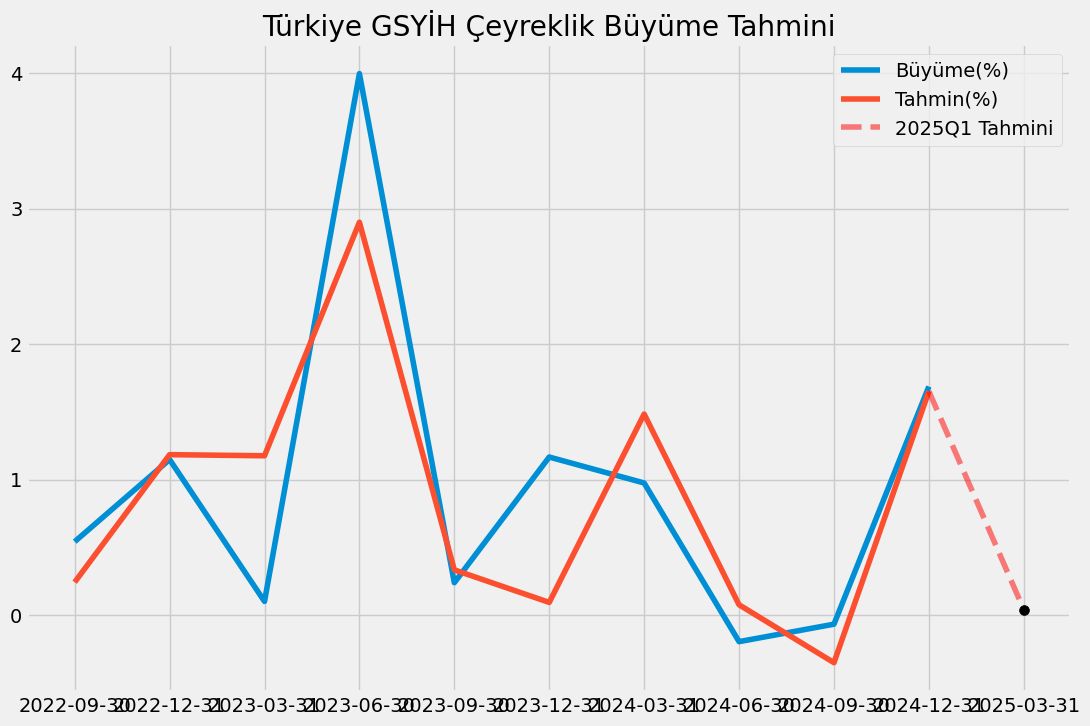

In [38]:
plt.figure(figsize=(12,8))
plt.title("Türkiye GSYİH Çeyreklik Büyüme Tahmini")
plt.plot(tahminler1["Büyüme"][:-1],label="Büyüme(%)")
plt.plot(tahminler1["Tahmin"][:-1],label="Tahmin(%)")
plt.plot(tahminler1["Tahmin"].iloc[-2:],"--",label="2025Q1 Tahmini",color="red",alpha=0.5)
plt.scatter(x=tahminler1.index[-1],y=tahminler1["Tahmin"][-1],color="black",s=50,zorder=3)
plt.legend()

In [39]:
selected_features =["KKO","Kart","Sanayi","Tüketici Güven","Normal Sipariş","Reel Güven"]
X=scaled_data[selected_features]
y=scaled_data["Büyüme"]
X=np.array(X)
y=np.array(y).reshape(-1,1)
X=pd.DataFrame(X,columns=selected_features)
y=pd.DataFrame(y,columns=["Büyüme"])
X_train,X_test=X.iloc[:-11,:],X.iloc[-11:,:]
y_train,y_test=y[:-11],y[-11:]
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.1,random_state=42)
for i in range(10):
    keras.utils.set_random_seed(i)
    early_stopping = EarlyStopping(monitor='val_loss', patience=0, restore_best_weights=True)
    model = Sequential()   
    model.add(Dense(units=71,activation='relu',input_dim=(X_train.shape[1]),kernel_regularizer=l2(0.2523544840003112)))
    model.add(Dense(units=1))
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.04866959242297068)
    model.compile(optimizer=optimizer, loss='mse', metrics=['mean_squared_error'])
    history=model.fit(X_train, y_train, epochs=1000, batch_size=30,callbacks=[early_stopping],verbose=0,validation_data=(X_val,y_val))
    y_pred = model.predict(X_test)
    pred=scaler.inverse_transform(model.predict(np.array(X_test)))
    pred=pd.DataFrame(pred)
    pred.columns=["Büyüme"]
    pred=pred.set_index(pd.date_range(start="2022-09-30",periods=len(pred),freq="Q"))
    tahminler2=pd.DataFrame()
    tahminler2["Büyüme"]=data["Büyüme"].iloc[-10:]
    tahminler2["Tahmin"]=pred["Büyüme"]
    tahminler2.index=tahminler2.index.strftime("%Y-%m-%d")
    tahminler.append(pred.iloc[-1,0])
    hata.append(mean_squared_error(tahminler2["Büyüme"].iloc[:-1],tahminler2["Tahmin"].iloc[:-1]))
    modeller[f"NN_{i+10}"]=pred["Büyüme"]
    print(pred.iloc[-1,0])

1/1 [==============================] - 0s 72ms/step
0.8891974
1/1 [==============================] - 0s 79ms/step
0.9416598
1/1 [==============================] - 0s 65ms/step
0.40217325
1/1 [==============================] - 0s 91ms/step
-0.04978629
1/1 [==============================] - 0s 65ms/step
0.44421193
1/1 [==============================] - 0s 66ms/step
0.67690223
1/1 [==============================] - 0s 64ms/step
0.81819
1/1 [==============================] - 0s 73ms/step
0.23319273
1/1 [==============================] - 0s 68ms/step
-0.14801045
1/1 [==============================] - 0s 85ms/step
0.08237223


In [40]:
keras.utils.set_random_seed(42)
early_stopping = EarlyStopping(monitor='val_loss', patience=0, restore_best_weights=True)
model = Sequential()   
model.add(Dense(units=71,activation='relu',input_dim=(X_train.shape[1]),kernel_regularizer=l2(0.2523544840003112)))
model.add(Dense(units=1))
optimizer = tf.keras.optimizers.Adam(learning_rate=0.04866959242297068)
model.compile(optimizer=optimizer, loss='mse', metrics=['mean_squared_error'])
history=model.fit(X_train, y_train, epochs=1000, batch_size=30,callbacks=[early_stopping],verbose=0,validation_data=(X_val,y_val))
y_pred = model.predict(X_test)
pred=scaler.inverse_transform(model.predict(np.array(X_test)))
pred=pd.DataFrame(pred)
pred.columns=["Büyüme"]
pred=pred.set_index(pd.date_range(start="2022-09-30",periods=len(pred),freq="Q"))


pred

1/1 [==============================] - 0s 67ms/step


,Büyüme
2022-09-30,0.828458
2022-12-31,1.557695
2023-03-31,0.793598
2023-06-30,3.144360
2023-09-30,0.129953
2023-12-31,0.348833
2024-03-31,1.493917
2024-06-30,0.043094
2024-09-30,-0.329138
2024-12-31,1.444525


In [41]:
tahminler2=pd.DataFrame()
tahminler2["Büyüme"]=data["Büyüme"].iloc[-11:]
tahminler2["Tahmin"]=pred["Büyüme"]
tahminler2.index=tahminler2.index.strftime("%Y-%m-%d")
tahminler2=tahminler2.round(1)
tahminler2

,Büyüme,Tahmin
2022-09-30,0.5,0.8
2022-12-31,1.1,1.6
2023-03-31,0.1,0.8
2023-06-30,4.0,3.1
2023-09-30,0.2,0.1
2023-12-31,1.2,0.3
2024-03-31,1.0,1.5
2024-06-30,-0.2,0.0
2024-09-30,-0.1,-0.3
2024-12-31,1.7,1.4


In [42]:
mean_squared_error(tahminler2["Büyüme"].iloc[:-1],tahminler2["Tahmin"].iloc[:-1])

0.2880000216662894

In [43]:
selected_features =["KKO","Kart","Sanayi","Tüketici Güven","Normal Sipariş","Reel Güven","Elektrik"]
X=scaled_data[selected_features]
y=scaled_data["Büyüme"]
X=np.array(X)
y=np.array(y).reshape(-1,1)
X=pd.DataFrame(X,columns=selected_features)
y=pd.DataFrame(y,columns=["Büyüme"])
X_train,X_test=X.iloc[:-11,:],X.iloc[-11:,:]
y_train,y_test=y[:-11],y[-11:]
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.1,random_state=42)
for i in range(10):
    keras.utils.set_random_seed(i)
    early_stopping = EarlyStopping(monitor='val_loss', patience=0, restore_best_weights=True)
    model = Sequential()   
    model.add(Dense(units=14,activation='relu',input_dim=(X_train.shape[1]),kernel_regularizer=l2(0.8647337880542664)))
    model.add(Dense(units=1))
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.0476600450555587)
    model.compile(optimizer=optimizer, loss='mse', metrics=['mean_squared_error'])
    history=model.fit(X_train, y_train, epochs=1000, batch_size=119,callbacks=[early_stopping],verbose=0,validation_data=(X_val,y_val))
    y_pred = model.predict(X_test)
    pred=scaler.inverse_transform(model.predict(np.array(X_test)))
    pred=pd.DataFrame(pred)
    pred.columns=["Büyüme"]
    pred=pred.set_index(pd.date_range(start="2022-09-30",periods=len(pred),freq="Q"))
    tahminler3=pd.DataFrame()
    tahminler3["Büyüme"]=data["Büyüme"].iloc[-10:]
    tahminler3["Tahmin"]=pred["Büyüme"]
    tahminler3.index=tahminler3.index.strftime("%Y-%m-%d")
    tahminler.append(pred.iloc[-1,0])
    hata.append(mean_squared_error(tahminler3["Büyüme"].iloc[:-1],tahminler3["Tahmin"].iloc[:-1]))
    modeller[f"NN_{i+20}"]=pred["Büyüme"]
    print(pred.iloc[-1,0])

1/1 [==============================] - 0s 68ms/step
1.0214148
1/1 [==============================] - 0s 65ms/step
1.7957155
1/1 [==============================] - 0s 88ms/step
1.3543042
1/1 [==============================] - 0s 82ms/step
1.1630673
1/1 [==============================] - 0s 73ms/step
1.5122087
1/1 [==============================] - 0s 68ms/step
1.186549
1/1 [==============================] - 0s 62ms/step
0.6350295
1/1 [==============================] - 0s 68ms/step
1.1497058
1/1 [==============================] - 0s 70ms/step
1.2944752
1/1 [==============================] - 0s 87ms/step
1.0847918


In [44]:
keras.utils.set_random_seed(42)
early_stopping = EarlyStopping(monitor='val_loss', patience=0, restore_best_weights=True)
model = Sequential()   
model.add(Dense(units=14,activation='relu',input_dim=(X_train.shape[1]),kernel_regularizer=l2(0.8647337880542664)))
model.add(Dense(units=1))
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0476600450555587)
model.compile(optimizer=optimizer, loss='mse', metrics=['mean_squared_error'])
history=model.fit(X_train, y_train, epochs=1000, batch_size=119,callbacks=[early_stopping],verbose=0,validation_data=(X_val,y_val))
y_pred = model.predict(X_test)
pred=scaler.inverse_transform(model.predict(np.array(X_test)))
pred=pd.DataFrame(pred)
pred.columns=["Büyüme"]
pred=pred.set_index(pd.date_range(start="2022-09-30",periods=len(pred),freq="Q"))

pred=scaler.inverse_transform(model.predict(np.array(X_test)))
pred=pd.DataFrame(pred)
pred.columns=["Büyüme"]
pred=pred.set_index(pd.date_range(start="2022-09-30",periods=len(pred),freq="Q"))
pred

1/1 [==============================] - 0s 28ms/step


,Büyüme
2022-09-30,-0.317860
2022-12-31,1.608859
2023-03-31,1.358469
2023-06-30,3.168702
2023-09-30,0.400015
2023-12-31,0.907034
2024-03-31,1.776323
2024-06-30,0.458797
2024-09-30,-0.155407
2024-12-31,1.973629


In [45]:
tahminler3=pd.DataFrame()
tahminler3["Büyüme"]=data["Büyüme"].iloc[-10:]
tahminler3["Tahmin"]=pred["Büyüme"]
tahminler3.index=tahminler3.index.strftime("%Y-%m-%d")
tahminler3

,Büyüme,Tahmin
2022-12-31,1.148543,1.608859
2023-03-31,0.101158,1.358469
2023-06-30,3.998077,3.168702
2023-09-30,0.239144,0.400015
2023-12-31,1.166981,0.907034
2024-03-31,0.975410,1.776323
2024-06-30,-0.195958,0.458797
2024-09-30,-0.067054,-0.155407
2024-12-31,1.687901,1.973629
2025-03-31,1.687901,0.888723


In [46]:
mean_squared_error(tahminler2["Büyüme"].iloc[:-1],tahminler2["Tahmin"].iloc[:-1])

0.2880000216662894

In [47]:
predictions=pd.DataFrame()
predictions["Tahmin"]=tahminler
predictions["Hata"]=hata
predictions["Ağırlık"]=1/predictions["Hata"]
predictions

,Tahmin,Hata,Ağırlık
0,1.021653,1.695202,0.589900
1,-0.225234,1.311554,0.762455
2,-0.515576,2.687117,0.372146
3,-0.162889,1.747835,0.572136
4,-0.937284,2.512098,0.398074
5,2.004878,2.049584,0.487904
6,0.057926,1.326408,0.753916
7,0.412658,0.755120,1.324293
8,-0.494656,0.961199,1.040367
9,0.183885,1.102905,0.906697


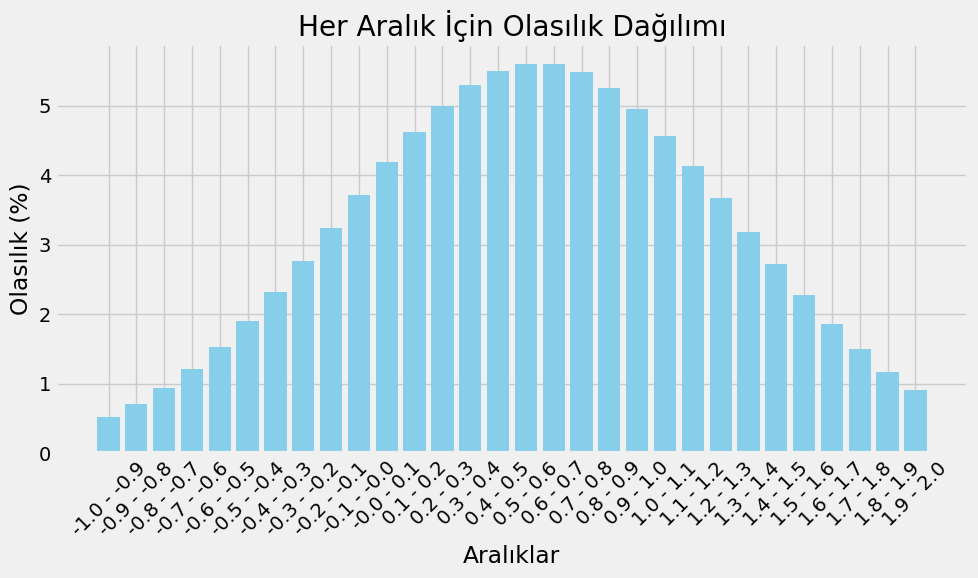

In [48]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

tahmin_degerleri = predictions["Tahmin"]

# Ortalama ve standart sapma hesapla
ortalama = np.mean(tahmin_degerleri)
standart_sapma = np.std(tahmin_degerleri)

# 1.7'den başlayıp her 0.1'lik aralık için olasılık hesaplama
baslangic = -1
bitis =  2.1

# 0.1'lik adımlarla aralıkları hesaplama
araliklar = np.arange(baslangic, bitis, 0.1)
olasliklar = []

for i in range(len(araliklar) - 1):
    alt = araliklar[i]
    ust = araliklar[i + 1]
    # Aralık için olasılığı hesapla
    olasilik = stats.norm.cdf(ust, loc=ortalama, scale=standart_sapma) - stats.norm.cdf(alt, loc=ortalama, scale=standart_sapma)
    olasliklar.append((alt, ust, olasilik))

# Bar grafik için verileri hazırlama
araliklar_labels = [f"{alt:.1f} - {ust:.1f}" for alt, ust, _ in olasliklar]
olasliklar_degerleri = [olasilik * 100 for _, _, olasilik in olasliklar]  # Olasılığı yüzdeye dönüştür

# Bar grafik oluşturma
plt.figure(figsize=(10, 6))
plt.bar(araliklar_labels, olasliklar_degerleri, color='skyblue')

# Başlık ve etiketler
plt.title('Her Aralık İçin Olasılık Dağılımı')
plt.xlabel('Aralıklar')
plt.ylabel('Olasılık (%)')
plt.xticks(rotation=45)  # Etiketlerin daha okunabilir olması için döndürme

# Grafiği gösterme
plt.tight_layout()
plt.show()

In [49]:
tahmin_degerleri=predictions["Tahmin"]
ortalama = np.sum(predictions["Tahmin"]*predictions["Ağırlık"])/(np.sum(predictions["Ağırlık"]))
standart_sapma = np.std(tahmin_degerleri)

for esik in [0.995]:
    z = stats.norm.ppf(esik) 
    if esik==0.995:
        guven=99
    elif esik==0.975:
        guven=95
    elif esik==0.95:
        guven=90
    elif esik==0.85:
        guven=70


    alt_limit = ortalama - z * standart_sapma
    ust_limit = ortalama + z * standart_sapma

    print(f"%{guven} olasılıkla tahminler {alt_limit:.2f} ile {ust_limit:.2f} arasındadır.")

%99 olasılıkla tahminler -1.22 ile 2.43 arasındadır.


In [50]:
sonuç=pd.DataFrame()
sonuç=pd.concat([tahminler1["Tahmin"],tahminler2["Tahmin"],tahminler3["Tahmin"]],axis=1)
sonuç["Ortalama"]=sonuç.mean(axis=1)
sonuç["Büyüme"]=tahminler1["Büyüme"]
sonuç.index=pd.to_datetime(sonuç.index)
sonuç

,Tahmin,Tahmin,Tahmin,Ortalama,Büyüme
2022-09-30,0.242941,0.8,NaN,0.521470,0.542207
2022-12-31,1.184579,1.6,1.608859,1.464479,1.148543
2023-03-31,1.176308,0.8,1.358469,1.111592,0.101158
2023-06-30,2.900449,3.1,3.168702,3.056383,3.998077
2023-09-30,0.333818,0.1,0.400015,0.277944,0.239144
2023-12-31,0.093745,0.3,0.907034,0.433593,1.166981
2024-03-31,1.484593,1.5,1.776323,1.586972,0.975410
2024-06-30,0.076208,0.0,0.458797,0.178335,-0.195958
2024-09-30,-0.351348,-0.3,-0.155407,-0.268918,-0.067054
2024-12-31,1.652666,1.4,1.973629,1.675432,1.687901


In [51]:
import pandas as pd
from datetime import datetime


csv_file = "cari.csv"
df = pd.read_csv(csv_file, index_col=0)

# Bugünün tarihini "dd-mm-yyyy" formatında al
today_date = datetime.today().strftime("%Y-%m-%d")

# Yeni tahmin değeri
new_tahmin = sonuç["Ortalama"].iloc[-1]

try:
    df.loc[today_date] = [new_tahmin, ust_limit, alt_limit]
except:
    pass

df.to_csv(csv_file)

print(f"{today_date} tarihli tahmin başarıyla eklendi.")


2025-04-29 tarihli tahmin başarıyla eklendi.


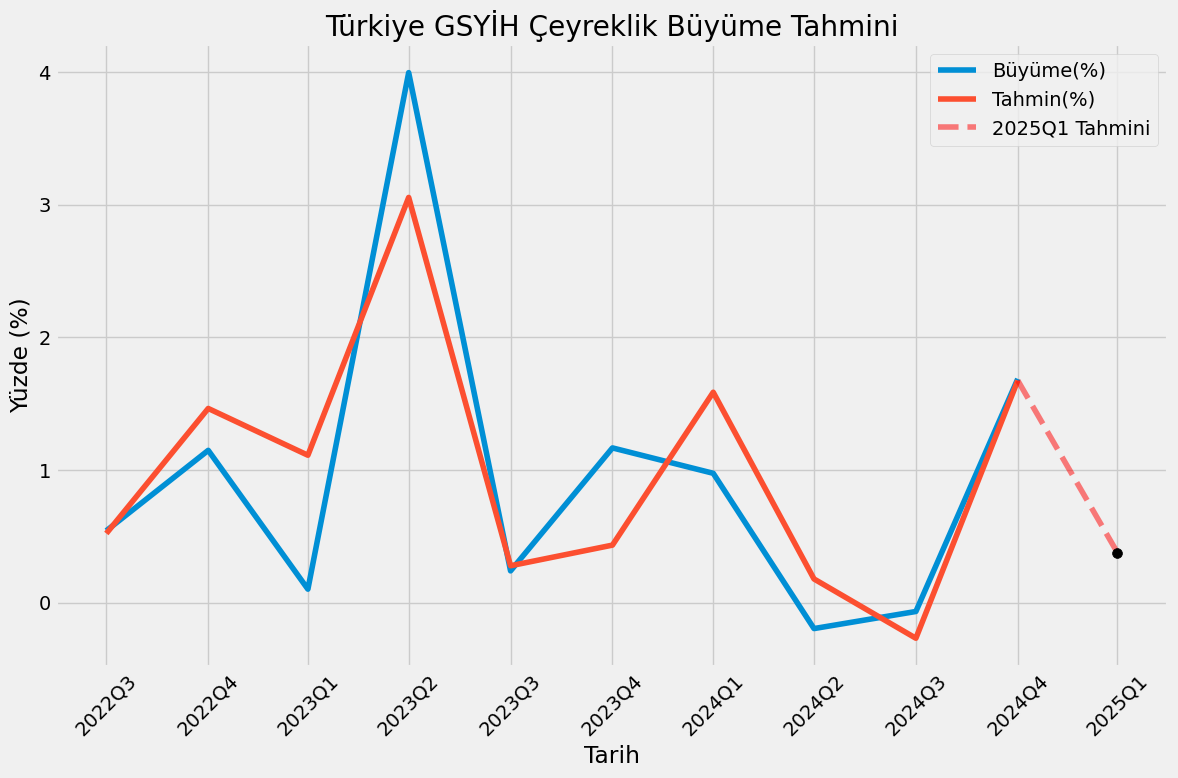

In [52]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

def tarih_ceyrek(tarih):
    yil = tarih.year
    ay = tarih.month
    if ay <= 3:
        return f"{yil}Q1"
    elif ay <= 6:
        return f"{yil}Q2"
    elif ay <= 9:
        return f"{yil}Q3"
    else:
        return f"{yil}Q4"

plt.figure(figsize=(12, 8))
plt.title("Türkiye GSYİH Çeyreklik Büyüme Tahmini")

# Tahminlerin çizimi
plt.plot(sonuç["Büyüme"][:-1], label="Büyüme(%)")
plt.plot(sonuç["Ortalama"][:-1], label="Tahmin(%)")

# 2024Q1 Tahmini çizimi
plt.plot(sonuç["Ortalama"].iloc[-2:], "--", label="2025Q1 Tahmini", color="red", alpha=0.5)

# Son tahmin noktasının gösterimi
plt.scatter(x=sonuç.index[-1], y=sonuç["Ortalama"][-1], color="black", s=50, zorder=3)

# Eksen etiketlerinin ve gösterge için konfigürasyon
plt.legend()
# Çeyreklik gösterimi için eksen etiketlerinin ve formatın ayarlanması
tarihler = [tarih_ceyrek(t) for t in sonuç.index]
plt.xticks(ticks=sonuç.index, labels=tarihler, rotation=45)
plt.xlabel('Tarih')
plt.ylabel('Yüzde (%)')
plt.grid(True)


plt.tight_layout()
plt.show()


In [53]:
yıllık=pd.read_excel("gayrisafi yurtici hasila harcama yontemiyle mevsim ve takvim etkisinden arindirilmis zincirlenmis ha.xls")
yıllık=yıllık.iloc[6:34,14:18]


veri=[]
for i in range(len(yıllık)):
   veri.append(yıllık.iloc[i,:].values)


veri=np.array(veri)
veri=veri.reshape(1,-1)
veri=pd.DataFrame(veri.T)
veri.columns=["Büyüme"]
veri=veri.dropna()
veri=veri.set_index(pd.date_range(start="1998-03-31",freq="Q",periods=len(veri)))

In [54]:


veri.loc[pd.to_datetime("2025-03-31")]=veri["Büyüme"].iloc[-1]*(1+(sonuç["Ortalama"].iloc[-1]/100))


In [55]:
veri["Tahmin"]=0
veri["Tahmin"].loc[sonuç.index[0]]=veri.loc["2022-09-30","Büyüme"]*(1+(sonuç["Ortalama"].iloc[0]/100))
for i in range(1,len(sonuç)):
    veri["Tahmin"].loc[sonuç.index[i]]=veri.loc[sonuç.index[i-1],"Büyüme"]*(1+(sonuç["Ortalama"].iloc[i]/100))

veri["Üst"]=0
veri["Üst"].iloc[-1]=(1+(df["Üst"].iloc[-1]/100))*veri.loc[sonuç.index[-2],"Büyüme"]

veri["Alt"]=0
veri["Alt"].iloc[-1]=(1+(df["Alt"].iloc[-1]/100))*veri.loc[sonuç.index[-2],"Büyüme"]

In [56]:
veri=veri[veri["Tahmin"]!=0]
for i in range(len(veri)):
    veri["Tahmin"].iloc[i]=((veri["Tahmin"].iloc[i]/veri["Büyüme"].iloc[i-4])-1)*100


In [57]:
veri["Üst"]=((veri["Üst"]/veri["Büyüme"].iloc[-5])-1)*100
veri["Alt"]=((veri["Alt"]/veri["Büyüme"].iloc[-5])-1)*100
veri["Büyüme"]=veri["Büyüme"].pct_change(4)*100



In [58]:
veri.to_csv("yıllık.csv")

In [59]:
import pandas as pd
from datetime import datetime


csv_file = "cariyıl.csv"
df = pd.read_csv(csv_file, index_col=0)

# Bugünün tarihini "dd-mm-yyyy" formatında al
today_date = datetime.today().strftime("%Y-%m-%d")

# Yeni tahmin değeri
new_tahmin = veri["Büyüme"].iloc[-1]
ust_limit=veri["Üst"].iloc[-1]
alt_limit=veri["Alt"].iloc[-1]
try:
    df.loc[today_date] = [new_tahmin, ust_limit, alt_limit]
except:
    pass

df.to_csv(csv_file)

print(f"{today_date} tarihli tahmin başarıyla eklendi.")


2025-04-29 tarihli tahmin başarıyla eklendi.


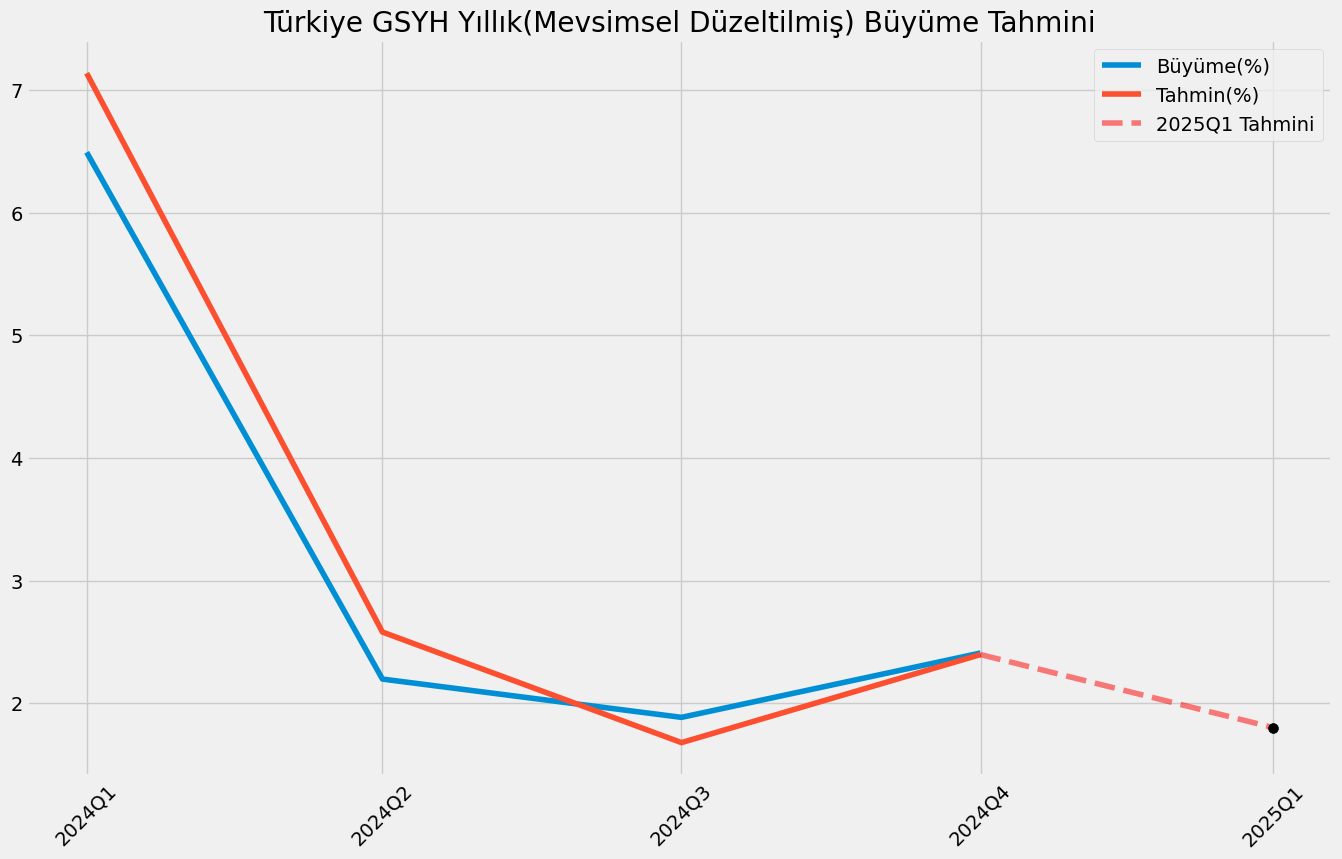

In [60]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

def tarih_ceyrek(tarih):
    yil = tarih.year
    ay = tarih.month
    if ay <= 3:
        return f"{yil}Q1"
    elif ay <= 6:
        return f"{yil}Q2"
    elif ay <= 9:
        return f"{yil}Q3"
    else:
        return f"{yil}Q4"

plt.figure(figsize=(15, 20))
plt.subplot(2,1,1)
plt.title("Türkiye GSYH Yıllık(Mevsimsel Düzeltilmiş) Büyüme Tahmini")

# Tahminlerin çizimi
plt.plot(veri["Büyüme"][-5:-1], label="Büyüme(%)")
plt.plot(veri["Tahmin"][-5:-1], label="Tahmin(%)")

# 2024Q1 Tahmini çizimi
plt.plot(veri["Tahmin"].iloc[-2:], "--", label="2025Q1 Tahmini", color="red", alpha=0.5)

# Son tahmin noktasının gösterimi
plt.scatter(x=veri.index[-1], y=veri["Tahmin"][-1], color="black", s=50, zorder=3)

# Eksen etiketlerinin ve gösterge için konfigürasyon
plt.legend()
# Çeyreklik gösterimi için eksen etiketlerinin ve formatın ayarlanması
tarihler = [tarih_ceyrek(t) for t in veri.index[-5:]]
plt.xticks(ticks=veri.index[-5:], labels=tarihler, rotation=45)
plt.grid(True)





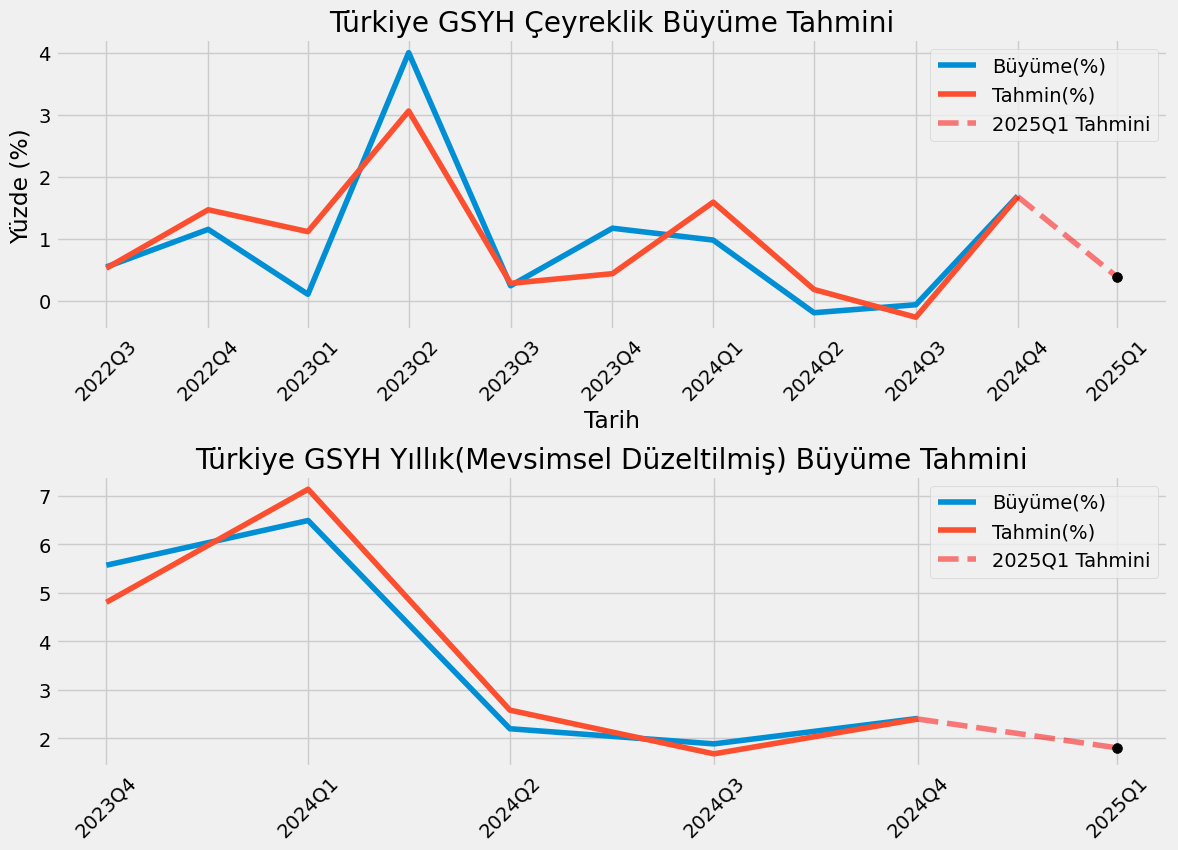

In [62]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

def tarih_ceyrek(tarih):
    yil = tarih.year
    ay = tarih.month
    if ay <= 3:
        return f"{yil}Q1"
    elif ay <= 6:
        return f"{yil}Q2"
    elif ay <= 9:
        return f"{yil}Q3"
    else:
        return f"{yil}Q4"

plt.figure(figsize=(12, 8))
plt.subplot(2,1,1)
plt.title("Türkiye GSYH Çeyreklik Büyüme Tahmini")

# Tahminlerin çizimi
plt.plot(sonuç["Büyüme"][:-1], label="Büyüme(%)")
plt.plot(sonuç["Ortalama"][:-1], label="Tahmin(%)")

# 2024Q1 Tahmini çizimi
plt.plot(sonuç["Ortalama"].iloc[-2:], "--", label="2025Q1 Tahmini", color="red", alpha=0.5)

# Son tahmin noktasının gösterimi
plt.scatter(x=sonuç.index[-1], y=sonuç["Ortalama"][-1], color="black", s=50, zorder=3)

# Eksen etiketlerinin ve gösterge için konfigürasyon
plt.legend()
# Çeyreklik gösterimi için eksen etiketlerinin ve formatın ayarlanması
tarihler = [tarih_ceyrek(t) for t in sonuç.index]
plt.xticks(ticks=sonuç.index, labels=tarihler, rotation=45)
plt.xlabel('Tarih')
plt.ylabel('Yüzde (%)')
plt.grid(True)


plt.tight_layout()
plt.subplot(2,1,2)

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

def tarih_ceyrek(tarih):
    yil = tarih.year
    ay = tarih.month
    if ay <= 3:
        return f"{yil}Q1"
    elif ay <= 6:
        return f"{yil}Q2"
    elif ay <= 9:
        return f"{yil}Q3"
    else:
        return f"{yil}Q4"



plt.title("Türkiye GSYH Yıllık(Mevsimsel Düzeltilmiş) Büyüme Tahmini")

# Tahminlerin çizimi
plt.plot(veri["Büyüme"][-6:-1], label="Büyüme(%)")
plt.plot(veri["Tahmin"][-6:-1], label="Tahmin(%)")

# 2024Q1 Tahmini çizimi
plt.plot(veri["Tahmin"].iloc[-2:], "--", label="2025Q1 Tahmini", color="red", alpha=0.5)

# Son tahmin noktasının gösterimi
plt.scatter(x=veri.index[-1], y=veri["Tahmin"][-1], color="black", s=50, zorder=3)

# Eksen etiketlerinin ve gösterge için konfigürasyon
plt.legend()
# Çeyreklik gösterimi için eksen etiketlerinin ve formatın ayarlanması
tarihler = [tarih_ceyrek(t) for t in veri.index[-6:]]
plt.xticks(ticks=veri.index[-6:], labels=tarihler, rotation=45)
plt.subplots_adjust(hspace=0.5)
plt.grid(True)





In [108]:
veri

,Büyüme,Tahmin,Üst,Alt
2022-09-30,NaN,-6.510613,-100.000000,-100.000000
2022-12-31,NaN,-5.600099,-100.000000,-100.000000
2023-03-31,NaN,-6.447134,-100.000000,-100.000000
2023-06-30,NaN,-4.886473,-100.000000,-100.000000
2023-09-30,5.550766,5.665897,-100.000000,-100.000000
2023-12-31,5.570007,4.833327,-100.000000,-100.000000
2024-03-31,6.492022,7.148778,-100.000000,-100.000000
2024-06-30,2.197411,2.590307,-100.000000,-100.000000
2024-09-30,1.885232,1.695684,-100.000000,-100.000000
2024-12-31,2.409849,2.373313,-100.000000,-100.000000


In [64]:
import os
import subprocess
from datetime import datetime
import time
import git
from git import Repo
import os
repo_dir = ".git"  # Buraya Git deposunun yolunu girin

def git_add_commit_push():
    try:
        # Repo nesnesini oluştur
        repo = Repo(repo_dir)
        assert not repo.bare

        # Git add: tüm değişiklikleri ekliyoruz
        repo.git.add(A=True)  # A=True ile tüm dosyalar eklenir

        # Commit işlemi
        commit_message = "update"
        repo.index.commit(commit_message)
        print(f"Commit işlemi başarılı: {commit_message}")

        # Push işlemi
        origin = repo.remote(name='origin')
        origin.push()
        print("Push işlemi başarılı.")

    except Exception as e:
        print(f"Git işlemi sırasında hata oluştu: {e}")


git_add_commit_push()

Commit işlemi başarılı: update
Push işlemi başarılı.


In [65]:
günlük=pd.read_csv("cari.csv",index_col=0).drop_duplicates(keep="last")
yıllık=pd.read_csv("cariyıl.csv",index_col=0).drop_duplicates(keep="last")
yıllık

,Tahmin,Üst,Alt
2024-12-09,1.466983,1.639763,1.329052
2024-12-11,1.436758,1.602258,1.304639
2024-12-12,1.446833,1.614760,1.312777
2024-12-13,1.477058,1.652264,1.337190
2024-12-16,1.456908,1.627261,1.320914
2024-12-18,1.486125,1.663516,1.344514
2024-12-19,1.426683,1.589756,1.296501
2024-12-20,1.507283,1.689769,1.361603
2024-12-23,1.487133,1.664766,1.345328
2024-12-24,1.536500,1.726024,1.385202


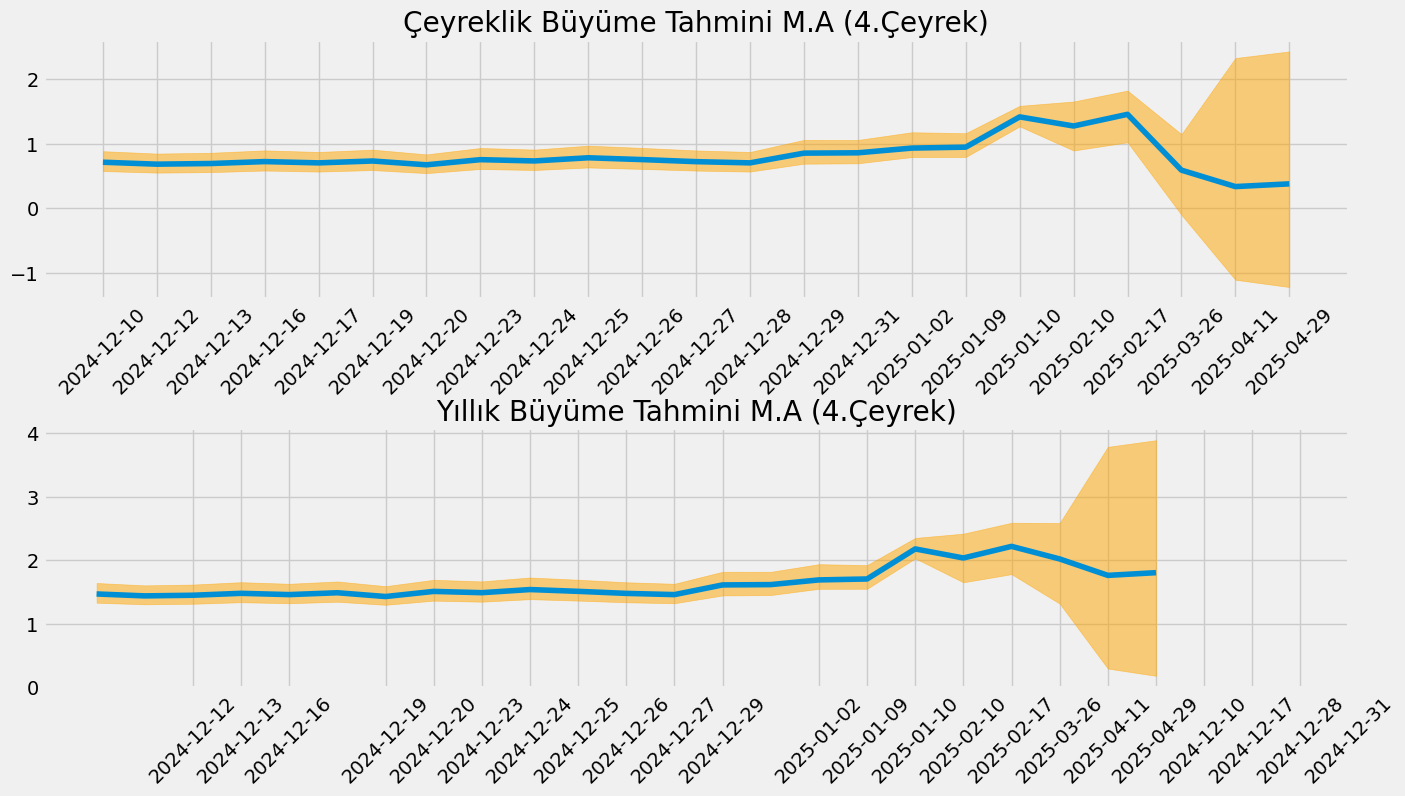

In [66]:

plt.figure(figsize=(15,8))
plt.subplot(2,1,1)
plt.title("Çeyreklik Büyüme Tahmini M.A (4.Çeyrek)")
plt.plot(günlük["Tahmin"],label="Ortalama")
plt.fill_between(günlük.index,günlük["Üst"],günlük["Alt"],alpha=0.5,color="orange")
plt.xticks(günlük.index,rotation=45)

plt.subplot(2,1,2)
plt.title("Yıllık Büyüme Tahmini M.A (4.Çeyrek)")
plt.plot(yıllık["Tahmin"],label="Ortalama")
plt.fill_between(yıllık.index,yıllık["Üst"],yıllık["Alt"],alpha=0.5,color="orange")
plt.xticks(günlük.index,rotation=45)

plt.subplots_adjust(hspace=0.5)


In [67]:



ham=pd.read_excel("veri3.xlsx",index_col=0)
arındırılmış=pd.read_excel("veri2.xlsx",index_col=0)
arındırılmış.index=pd.to_datetime(arındırılmış.index)
ham.index=pd.to_datetime(ham.index)


arındırılmış.loc["2025-03-31"]=((günlük["Tahmin"].iloc[-1]/100)+1)*arındırılmış.loc["2024-12-31"]
arındırılmış.index=pd.to_datetime(arındırılmış.index)

ham_yıllık=(((arındırılmış.loc["2025-03-31"].values[0]*0.901)/ham.loc["2024-03-31"])-1)*100
ham_yıllık=ham_yıllık.values[0]
ham_yıllık=np.round(ham_yıllık,2)


arındırılmış.loc["2025-03-31"]=((günlük["Üst"].iloc[-1]/100)+1)*arındırılmış.loc["2024-12-31"].values[0]

ham_yıllık_üst=(((arındırılmış.loc["2025-03-31"].values[0]*0.901)/ham.loc["2024-03-31"])-1)*100
ham_yıllık_üst=ham_yıllık_üst.values[0]
ham_yıllık_üst=np.round(ham_yıllık_üst,2)


arındırılmış.loc["2025-03-31"]=((günlük["Alt"].iloc[-1]/100)+1)*arındırılmış.loc["2024-12-31"].values[0]

ham_yıllık_alt=(((arındırılmış.loc["2025-03-31"].values[0]*0.901)/ham.loc["2024-03-31"])-1)*100
ham_yıllık_alt=ham_yıllık_alt.values[0]
ham_yıllık_alt=np.round(ham_yıllık_alt,2)

In [68]:
import pandas as pd
from datetime import datetime


csv_file = "ham.csv"
df = pd.read_csv(csv_file, index_col=0)

# Bugünün tarihini "dd-mm-yyyy" formatında al
today_date = datetime.today().strftime("%Y-%m-%d")

# Yeni tahmin değeri
new_tahmin = ham_yıllık
ust_limit=ham_yıllık_üst
alt_limit=ham_yıllık_alt
try:
    df.loc[today_date] = [new_tahmin, ust_limit, alt_limit]
except:
    pass

df.to_csv(csv_file)

print(f"{today_date} tarihli tahmin başarıyla eklendi.")


2025-04-29 tarihli tahmin başarıyla eklendi.


In [69]:
df

,Tahmin,Üst,Alt
2024-12-10,2.01,2.18,1.87
2024-12-11,2.03,2.21,1.88
2024-12-12,1.98,2.14,1.84
2024-12-13,1.99,2.16,1.85
2024-12-16,2.02,2.19,1.88
2024-12-17,2.00,2.17,1.86
2024-12-18,2.03,2.21,1.88
2024-12-19,2.03,2.20,1.88
2024-12-20,1.97,2.13,1.84
2024-12-23,2.05,2.23,1.90


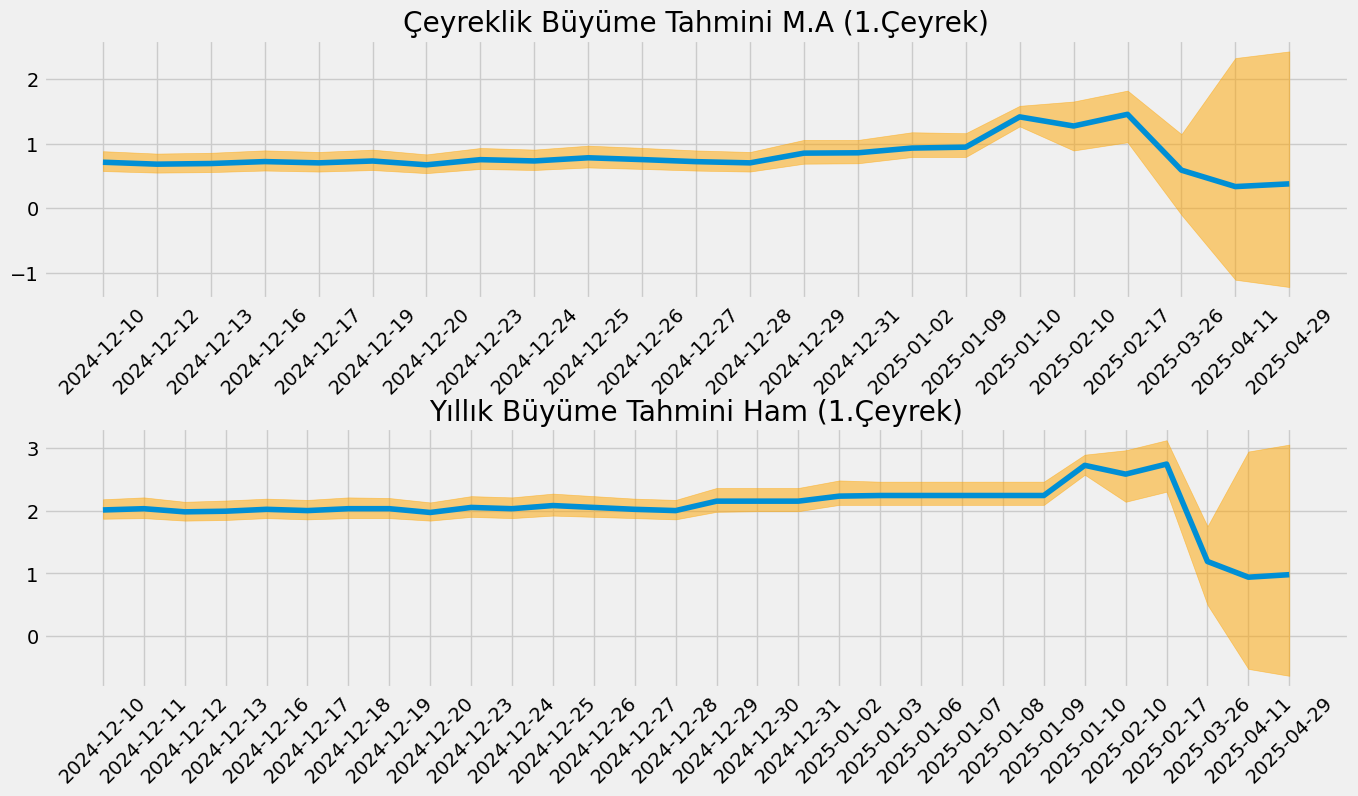

In [70]:

plt.figure(figsize=(15,8))
plt.subplot(2,1,1)
plt.title("Çeyreklik Büyüme Tahmini M.A (1.Çeyrek)")
plt.plot(günlük["Tahmin"],label="Ortalama")
plt.fill_between(günlük.index,günlük["Üst"],günlük["Alt"],alpha=0.5,color="orange")
plt.xticks(günlük.index,rotation=45)

plt.subplot(2,1,2)
plt.title("Yıllık Büyüme Tahmini Ham (1.Çeyrek)")
plt.plot(df["Tahmin"],label="Ortalama")
plt.fill_between(df.index,df["Üst"],df["Alt"],alpha=0.5,color="orange")
plt.xticks(df.index,rotation=45)

plt.subplots_adjust(hspace=0.5)
